# Car Price Prediction Project
**Members :** Ahmed Gul, Ahmed Obaid Raza<br>
**Date:** Nov 2025

## Project Objective
To develop a Machine Learning model that predicts the market price of used cars in Pakistan based on attributes like Make, Model, Year, Mileage and Engine Capacity.

__________________________________________________________________________________________________________________________________________________________________________________

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

__________________________________________________________________________________________________________________________________________________________________________________

## Phase 1: Data Exploration
In this  phase, we load the raw dataset and inspect its structure to identify quality issues.

**Key Goals:**
1. Understand data types.
2. Check overall structure of dataset.
3. Check shape of dataset.
4. Taking an overview about the values in the features.
5. Check for missing values.
6. Identify anomalies.

In [2]:
df = pd.read_csv('pakwheels_used_car_data_v02.csv')
df.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_12200\1574163121.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pakwheels_used_car_data_v02.csv')


,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,NaN,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0
5,7943736,Vehari,Imported,Sedan,Honda,Civic,2010.0,1300.0,Automatic,Petrol,Albastar Silver,Punjab,157000,2850000.0
6,7764683,Islamabad,NaN,Hatchback,Suzuki,Swift,2019.0,1300.0,manual,Petrol,Grey,Islamabad,45000,2675000.0
7,7943739,Faisalabad,NaN,Sedan,Honda,City,NaN,1300.0,Automatic,Petrol,Maroon,Lahore,187000,3450000.0
8,7894559,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Fire Quartz Red,Un-Registered,22517,3850000.0
9,7943724,Lahore,NaN,Sedan,Honda,City,2014.0,1300.0,Manual,Petrol,Crystal Black Pearl,Lahore,110000,2585000.0


In [3]:
# Dropping unnecessary feature
df = df.drop('addref', axis=1)

In [4]:
# Overall structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77881 entries, 0 to 77880
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          77881 non-null  object 
 1   assembly      24188 non-null  object 
 2   body          68974 non-null  object 
 3   make          77879 non-null  object 
 4   model         77880 non-null  object 
 5   year          73086 non-null  float64
 6   engine        77878 non-null  float64
 7   transmission  77873 non-null  object 
 8   fuel          76964 non-null  object 
 9   color         76396 non-null  object 
 10  registered    77880 non-null  object 
 11  mileage       77876 non-null  object 
 12  price         77298 non-null  float64
dtypes: float64(3), object(10)
memory usage: 7.7+ MB


In [5]:
# Checking Datatypes
print(f"Data Types:\n\n{df.dtypes}")

Data Types:

city             object
assembly         object
body             object
make             object
model            object
year            float64
engine          float64
transmission     object
fuel             object
color            object
registered       object
mileage          object
price           float64
dtype: object


In [6]:
# Shape of dataset
print("Features:",df.shape[1])
print("Records:",df.shape[0])

Features: 13
Records: 77881


In [7]:
check_features = ['registered', 'make', 'model', 'transmission', 'assembly', 'body', 'fuel', 'city','color']

# Checking number of unique values and inpsecting some of them
for col in check_features:
    print(f"COLUMN: {col.upper()}")
    uniques = df[col].unique()
    print(f"Total Unique Values: {df[col].nunique()}")    
    print(uniques[:15])
    print("-" * 50) 

COLUMN: REGISTERED
Total Unique Values: 126
['Lahore' 'Punjab' 'Islamabad' 'Un-Registered' 'Sindh' 'Swat' 'Karachi'
 'Faisalabad' 'Multan' 'Peshawar' 'Rawalpindi' 'Hyderabad' 'Quetta'
 'Mirpur A.K.' 'islamabad']
--------------------------------------------------
COLUMN: MAKE
Total Unique Values: 72
['Toyota' 'Honda' 'Suzuki' 'Daihatsu' 'Mitsubishi' 'Hyundai' 'KIA'
 'Nissan' 'Adam' 'Mazda' 'Lexus' 'Mercedes' 'BMW' 'Changan' 'DFSK']
--------------------------------------------------
COLUMN: MODEL
Total Unique Values: 435
['Corolla' 'City' 'Yaris' 'Swift' 'Civic' 'Move' 'Mehran' 'Mira' 'Pajero'
 'Cultus' 'Vitz' 'Alto' 'Land' 'BR-V' 'Tucson']
--------------------------------------------------
COLUMN: TRANSMISSION
Total Unique Values: 8
['Manual' 'Automatic' 'manual' 'automatic' 'MANUAL' 'AutomatiC' nan
 'AUTOMATIC' 'MAnual']
--------------------------------------------------
COLUMN: ASSEMBLY
Total Unique Values: 1
[nan 'Imported']
--------------------------------------------------
COLUMN: 

In [8]:
# Checking Missing values percentage in each attribute
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

assembly        68.942361
body            11.436679
year             6.156829
color            1.906755
fuel             1.177437
price            0.748578
transmission     0.010272
mileage          0.006420
engine           0.003852
make             0.002568
model            0.001284
registered       0.001284
dtype: float64


In [9]:
df.describe()

,year,engine,price
count,73086.000000,77878.000000,7.729800e+04
mean,2012.813247,1408.068002,3.883424e+06
std,7.516863,704.452690,5.759306e+06
min,1990.000000,3.000000,1.100000e+05
25%,2007.000000,1000.000000,1.450000e+06
50%,2015.000000,1300.000000,2.700000e+06
75%,2019.000000,1600.000000,4.500000e+06
max,2022.000000,15000.000000,5.290000e+08


**Observation:**
Notice that the maximum engine capacity is **15,000 cc** and the minimum is **3 cc**. This suggests the presence of data entry errors or non-passenger vehicles (trucks) which must be addressed in the next phase. Maximum price is also around 50 Crore, We will have a look on it in next phase.

__________________________________________________________________________________________________________________________________________________________________________________

## Phase 2: Data Cleaning & Preprocessing
Based on our exploration, we identified several issues:
* **Inconsistent Text:** Capitalization errors in City and Make.
* **Incorrect Data Types:** Mileage is stored as text.
* **Missing Values:** Filling missing data.
* **Huge Number of Unique Colors:** Similar colors with different names (White, Pearl White)

**Actions Taken:**
1. Standardized all text to lowercase.
2. Imputed missing values using Group-wise Median and Modes.
3. Handled the huge amount of colors.

In [10]:
# Converting Datatype
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

In [11]:
# Standardizing Colors

# Convert to string and lowercase everything first
df['color'] = df['color'].astype(str).str.lower().str.strip()

# Force-group the colors using "contains" logic
df.loc[df['color'].str.contains('white', na=False), 'color'] = 'white'
df.loc[df['color'].str.contains('black', na=False), 'color'] = 'black'
df.loc[df['color'].str.contains('silver', na=False), 'color'] = 'silver'
df.loc[df['color'].str.contains('grey|gray', na=False), 'color'] = 'grey'
df.loc[df['color'].str.contains('blue|navy|indigo', na=False), 'color'] = 'blue'
df.loc[df['color'].str.contains('red|wine|burgundy|maroon', na=False), 'color'] = 'red'
df.loc[df['color'].str.contains('green', na=False), 'color'] = 'green'
df.loc[df['color'].str.contains('gold|beige|champagne', na=False), 'color'] = 'gold'
df.loc[df['color'].str.contains('brown|bronze', na=False), 'color'] = 'brown'
df.loc[df['color'].str.contains('yellow', na=False), 'color'] = 'yellow'
df.loc[df['color'].str.contains('orange', na=False), 'color'] = 'orange'
df.loc[df['color'].str.contains('purple', na=False), 'color'] = 'purple'

# Mark uncommon color as Other
main_colors = ['white', 'black', 'silver', 'grey', 'blue', 'red', 'green', 'gold', 'brown', 'yellow', 'orange', 'purple']
df.loc[~df['color'].isin(main_colors), 'color'] = 'other'

print(f"Unique Colors Reduced to: {df['color'].nunique()}")
print(df['color'].value_counts())

Unique Colors Reduced to: 13
color
white     33562
silver    12369
black     11126
grey       6394
blue       3496
red        3254
other      3168
gold       2110
green      1291
brown       747
yellow      148
purple      132
orange       84
Name: count, dtype: int64


In [12]:
cat_cols = ['category', 'city', 'assembly', 'body', 'make', 'model', 'registered', 'transmission', 'fuel', 'color']

# Standardize (lower-case) every entry in categorical feature
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()
        df[col] = df[col].replace('nan', np.nan)

In [13]:
# Fill missing prices by median of specific Make, Model, and Year
group_medians_1 = df.groupby(['make', 'model', 'year'])['price'].transform('median')
df['price'] = df['price'].fillna(group_medians_1)

# If that fails, we use median of just Make and Year
group_medians_2 = df.groupby(['make', 'year'])['price'].transform('median')
df['price'] = df['price'].fillna(group_medians_2)

# Using global median for any remaining missing values
df['price'] = df['price'].fillna(df['price'].median())

In [14]:
# Fill missing engines by median of specific Make, Model
group_engine_median = df.groupby(['make', 'model'])['engine'].transform('median')
df['engine'] = df['engine'].fillna(group_engine_median)

In [15]:
group_year_median = df.groupby(['make', 'model'])['year'].transform('median')
df['year'] = df['year'].fillna(group_year_median)
df['year'] = df['year'].fillna(df['year'].median())

In [16]:
# Missing value is 'Local'
df['assembly'] = df['assembly'].fillna('local')

# Fill missing values with the most common color (Mode)
df['color'] = df['color'].fillna(df['color'].mode()[0])

# Use Median to fill null entries
df['mileage'] = df['mileage'].fillna(df['mileage'].median())

# Missing often means the car is 'Unregistered'
df['registered'] = df['registered'].fillna('unregistered')

In [17]:
# Helper function to get the most frequent value (Mode)
def get_most_common(x):
    modes = x.mode()
    return modes[0] if not modes.empty else None

cols_to_fix = ['body', 'fuel', 'transmission']

for col in cols_to_fix:
    # Fill using the mode of the specific Make & Model
    group_modes = df.groupby(['make', 'model'])[col].transform(get_most_common)
    df[col] = df[col].fillna(group_modes)

    # Fill by global mode for any remaining missing values
    global_mode = df[col].mode()[0]
    df[col] = df[col].fillna(global_mode)

In [18]:
# Dropping 3 rows
df = df.dropna(subset=['make', 'model'])

In [19]:
print("--- Missing Values Count ---")
print(df.isnull().sum())
print(f"\nFinal Dataset Shape: {df.shape}")

--- Missing Values Count ---
city            0
assembly        0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64

Final Dataset Shape: (77878, 13)


__________________________________________________________________________________________________________________________________________________________________________________

* Now fixing the anomalies in **engine sizes**.

In [20]:
# Check for super high engine sizes (Outliers)
print("--- Huge Engines (> 7000 cc) ---")
print(df[df['engine'] > 7000][['make', 'model', 'year', 'engine', 'price']])

# Check for tiny engine sizes (< 600 cc)
print("\n--- Tiny Engines (< 600 cc) ---")
print(df[df['engine'] < 600][['make', 'model', 'year', 'engine', 'price']])

--- Huge Engines (> 7000 cc) ---
             make     model    year   engine       price
3305       nissan      leaf  2004.0  13000.0   1600000.0
5997       toyota   corolla  2003.0   7744.0   2400000.0
17325  mitsubishi    lancer  1991.0  13300.0    630000.0
18139      toyota   corolla  2017.0  13000.0   3880000.0
19914      toyota   corolla  1995.0  13000.0   1500000.0
22095      toyota   corolla  2013.0  13000.0   2700000.0
22365       honda     freed  2014.0  14983.0   4050000.0
30386        hino       500  1991.0   7990.0   6500000.0
32065       honda     civic  1995.0  15000.0    750000.0
37661      suzuki    khyber  1997.0  10000.0    550000.0
41233      toyota     prado  2002.0  10000.0   3200000.0
41598      suzuki      alto  1995.0   8888.0    600000.0
47617      suzuki    khyber  1996.0  10001.0    550000.0
49793      suzuki      ravi  2015.0  12345.0    870000.0
51585   ssangyong  chairman  2015.0  12905.0    250000.0
53119         kia  sportage  2020.0  10000.0   7250000.

In [21]:
# Detect engine outliers (< 600cc or > 7000cc)
bad_engine = (df['engine'] < 600) | (df['engine'] > 7000)

# Replace outliers with the median engine size of the corresponding Make & Model
df.loc[bad_engine, 'engine'] = df.groupby(['make', 'model'])['engine'].transform('median')

In [22]:
# EV  Normalization
ev_mapping = {
    'model': 3500,       # Tesla Model S/3/X/Y
    'taycan': 4000,      # Porsche Taycan
    'e-tron': 4000,      # Audi e-tron
    'ix': 4000,          # BMW iX
    'ix3': 4000,          # BMW iX3
    'i7': 4000,          # BMW i7
    'i4': 3000,          # BMW i4
    'i8': 1500,          # BMW i8 (Plug-in Hybrid/Electric)
    'seres': 1500,       # DFSK Seres 3
    'gv60': 3000,        # Genesis GV60
    'ux': 2000,          # Lexus UX 300e
    'sakura': 660,       # Nissan Sakura
    'aria': 1000,        # Rinco Aria
}

# Applying the mapping iteratively
for keyword, cc_value in ev_mapping.items():

    # Identifying rows containing the model keyword (Case Insensitive)
    mask = (df['model'].str.contains(keyword, case=False))

    # Standardize Engine Size (Equivalent CC)     
    df.loc[mask, 'engine'] = cc_value

    # Correct Fuel Type )
    df.loc[mask, 'fuel'] = 'electric'

print(f"Engine Range: {df['engine'].min()} - {df['engine'].max()}")

Engine Range: 533.0 - 12905.0


In [23]:
# Checking for Big engine again
print(df[df['engine'] > 7000][['make', 'model', 'year', 'engine', 'price']])

            make     model    year   engine     price
51585  ssangyong  chairman  2015.0  12905.0  250000.0


In [24]:
# Fixing the last big engine
df.loc[df['engine'] > 7000, 'engine'] = 3200
print(f"Engine Range: {df['engine'].min()} - {df['engine'].max()}")

Engine Range: 533.0 - 6800.0


In [25]:
# Prices greater than 10 crore
df[df['price'] > 100000000]

,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
646,lahore,local,sedan,toyota,corolla,2021.0,1598.0,manual,petrol,silver,lahore,26401.0,529000000.0
778,faisalabad,imported,suv,range,rover,2021.0,1997.0,automatic,petrol,black,islamabad,46403.0,120000000.0
8603,lahore,imported,sedan,bmw,7,2022.0,3000.0,automatic,petrol,white,un-registered,65.0,110000000.0
11881,islamabad,imported,suv,toyota,land,2006.0,3500.0,automatic,petrol,other,un-registered,80.0,101000000.0
12529,karachi,imported,suv,lexus,lx,2022.0,3400.0,automatic,petrol,black,un-registered,335.0,170000000.0
12564,lahore,imported,suv,toyota,land,2006.0,3500.0,automatic,petrol,other,un-registered,1000.0,101000000.0
14480,lahore,imported,sedan,bmw,i7,2015.0,4000.0,automatic,electric,black,un-registered,100.0,107500000.0
23224,lahore,imported,suv,lexus,lx,2022.0,3400.0,automatic,petrol,black,un-registered,500.0,165000000.0
24914,islamabad,imported,suv,lexus,lx,2021.0,5700.0,automatic,petrol,white,un-registered,1.0,110000000.0
25031,karachi,imported,suv,lexus,lx,2021.0,5700.0,automatic,petrol,white,sindh,1.0,120000000.0


**Observation:** All cars are expensive except the first one which is Toyota Corolla.

In [26]:
# Fixing Toyota Corolla price with mean price of that particular model
df.loc[646, 'price'] = df[(df['make'] == 'toyota') & (df['model'] == 'corolla') & (df['year'] == 2021)]['price'].median()

In [27]:
# Now the numerical columns are free from anomalies
df.describe()

,year,engine,mileage,price
count,77878.000000,77878.000000,77878.000000,7.787800e+04
mean,2012.830177,1400.393693,91084.549680,3.921018e+06
std,7.583169,655.705784,89154.647046,5.569160e+06
min,1990.000000,533.000000,1.000000,1.100000e+05
25%,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,2019.000000,1600.000000,123456.000000,4.525000e+06
max,2022.000000,6800.000000,1000000.000000,1.700000e+08


## Phase 3: Exploratory Data Analysis (EDA)
Now that the data is clean, we will analyze the relationships between features to determine which factors most heavily influence the vehicle price.

### 3.1 Correlation Analysis
We start with a Correlation Matrix to identify strong linear relationships between numerical variables.

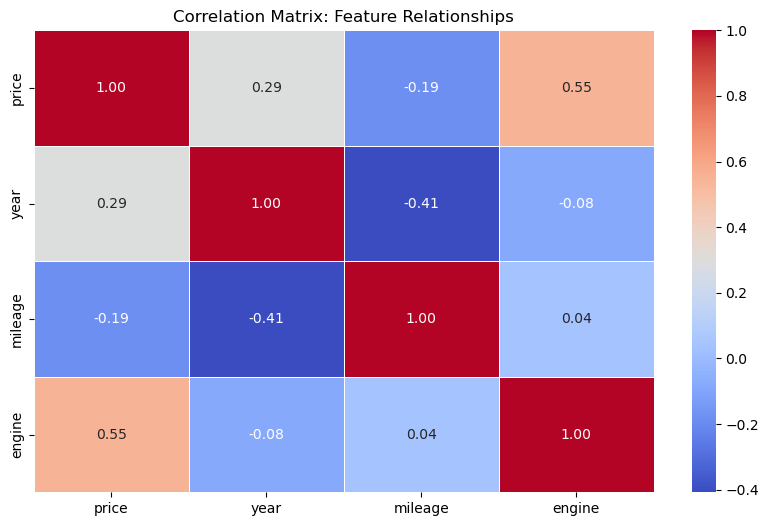

In [28]:
plt.figure(figsize=(10, 6))

# Calculate correlation between numeric columns
corr_matrix = df[['price', 'year', 'mileage', 'engine']].corr()

# Plot Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Feature Relationships')
plt.show()

**Observation:**
* **Year (0.29):** Weak positive correlation. Newer cars are slightly more expensive.
* **Engine (0.55):** Mild Strong positive correlation. Higher capacity (CC) drives price up.
* **Mileage (-0.19):** Weak negative correlation. Higher mileage lowers value, but it is less dominant than Year or Engine.

### 3.2 Target Variable Distribution
We analyze the distribution of `price` to check for skewness.

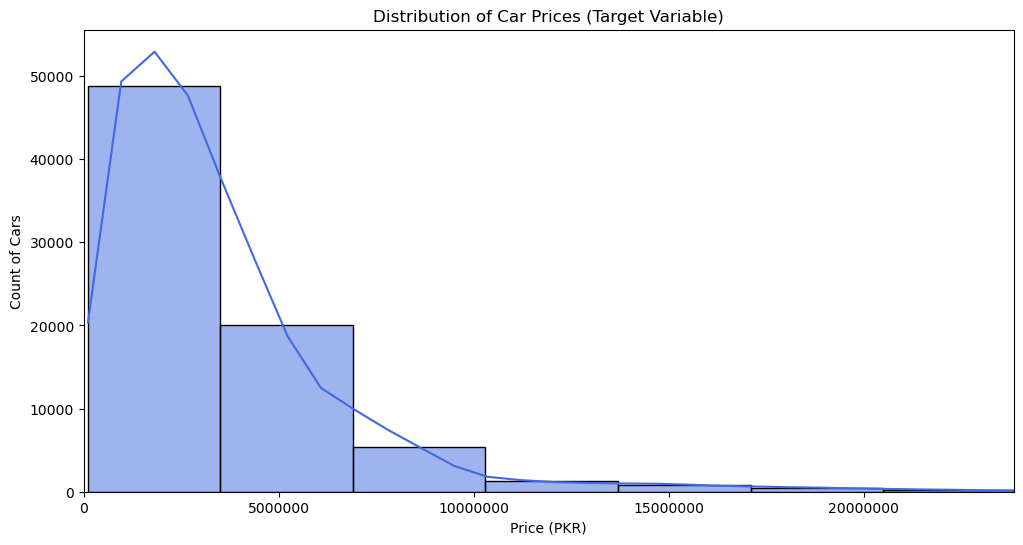

In [29]:
plt.figure(figsize=(12, 6))

# Histogram with KDE (Kernel Density Estimate) line
sns.histplot(df['price'], kde=True, bins=50, color='royalblue')

plt.title('Distribution of Car Prices (Target Variable)')
plt.xlabel('Price (PKR)')
plt.ylabel('Count of Cars')

# Fixing scientific notation on X-axis
plt.ticklabel_format(style='plain', axis='x') 
# Hide extreme outliers for a clearer view
plt.xlim(0, df['price'].quantile(0.99)) 

plt.show()

**Observation:** Most cars are ranging from around 10 Lacs to 10 crores. A few exceed the price of 10 crore.

### 3.3 Price Distribution by Brand
Does the badge on the grille determine the price? We analyze the price distribution across the top 10 most common manufacturers to see if brands have a significant market advantage over others.

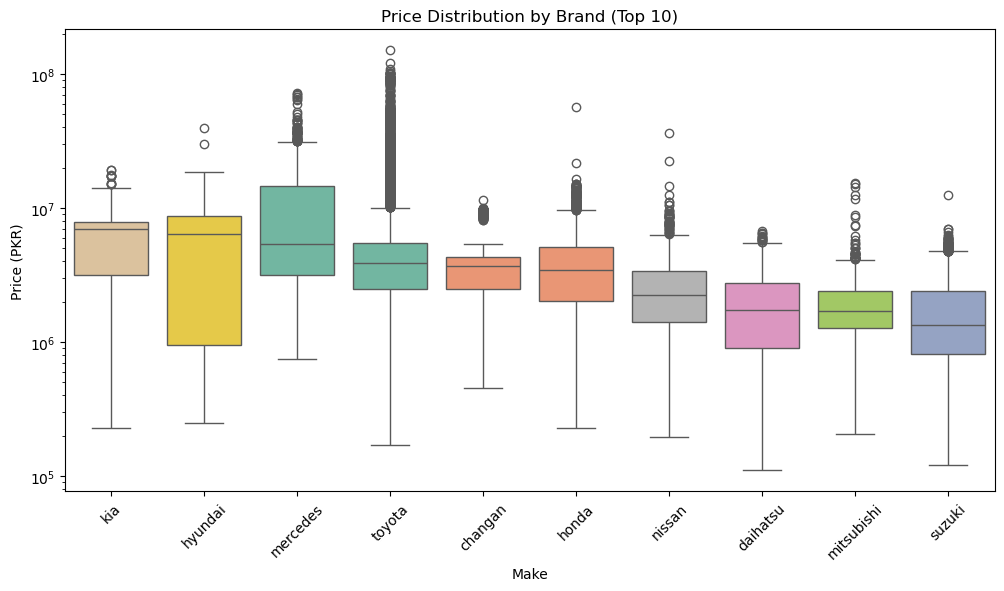

In [30]:
plt.figure(figsize=(12, 6))

# Filter data to only these top 10
top_makes = df['make'].value_counts().head(10).index
df_top = df[df['make'].isin(top_makes)]

# Create the Sorting Order (Highest Median Price -> Lowest)
sorted_order = df_top.groupby('make')['price'].median().sort_values(ascending=False).index

# Create Boxplot
sns.boxplot(data=df_top, x='make', y='price', palette='Set2', hue='make', order=sorted_order)

plt.title('Price Distribution by Brand (Top 10)')
plt.ylabel('Price (PKR)')
plt.xlabel('Make')
plt.yscale('log') # Log scale helps us see the boxes better if prices vary wildly
plt.xticks(rotation=45)
plt.show()

**Observation:**
1.  **Premium Leaders:** **Kia, Hyundai & mercedes** have the highest median price, making it as a distinct luxury outlier. **Toyota, Changan & Honda** follow, acting as the bridge between budget friendly and premium segments.
2.  **Product Diversity:** **Toyota** has the widest price spread. This confirms its unique position in Pakistan, selling everything from affordable used hatchbacks (Vitz/Passo) to ultra-luxury SUVs (Land Cruiser/Prado).
3.  **Economy Segment:** **Suzuki, mitsubishi, nissan & Daihatsu** are concentrated at the lower price range, indicating highly consistent pricing. This tells their role as the providers of budget-friendly transport.


**Conclusion:** The manufacturer (`make`) is a strong predictor of price tier and should be treated as a high-value categorical feature.

### 3.4 Impact of Transmission on Price
We analyze the price difference between **Automatic** and **Manual** transmission vehicles to see if convenience commands a higher market value.

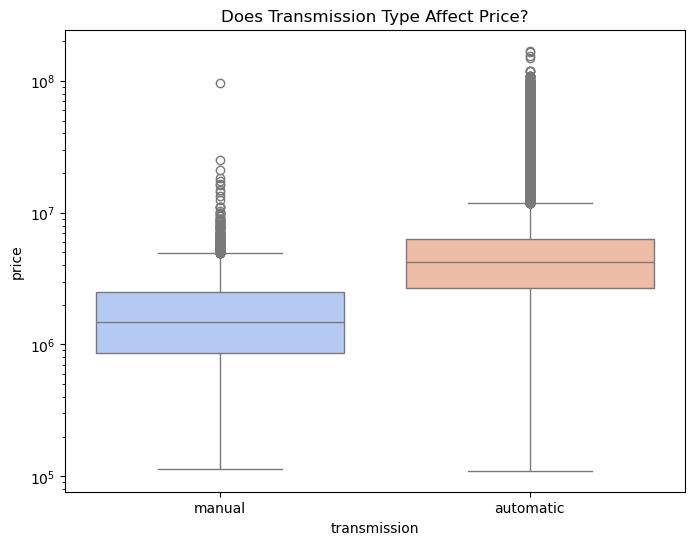

In [31]:
plt.figure(figsize=(8, 6))

# Boxplot comparing Auto vs Manual
sns.boxplot(data=df, x='transmission', y='price', palette='coolwarm', hue='transmission')

plt.title('Does Transmission Type Affect Price?')
plt.yscale('log') # Log scale again to handle the huge price range
plt.show()

**Observation:**
The box plot highlights a clear price distinction based on transmission type:
1.  **Automatic:** The median price for **Automatic** cars is significantly higher than for Manual ones.
2.  **Manual:** The **Manual** category has a lower median and a compressed interquartile range.
3.  **Outliers:** Both categories show high-end outliers, but the Automatic category extends much higher, confirming that the ultra-luxury segment is almost automatic.

**Conclusion:** Transmission type is a key differentiator in price and will be included as a feature.

### 3.5 Imported vs. Local Assembly
We compare the price distribution of Locally Assembled vehicles against Imported (Japanese/JDM) units to verify if build origin influences market value.

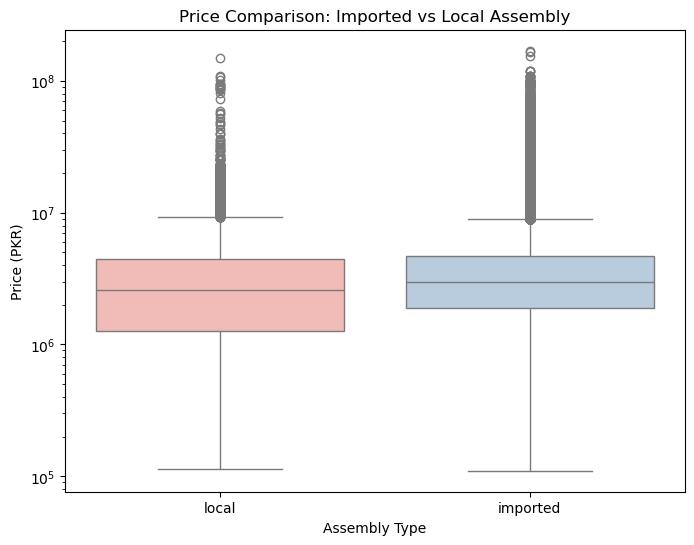

In [32]:
plt.figure(figsize=(8, 6))

# Boxplot: Local vs Imported
sns.boxplot(data=df, x='assembly', y='price', palette='Pastel1', hue='assembly')

plt.title('Price Comparison: Imported vs Local Assembly')
plt.ylabel('Price (PKR)')
plt.xlabel('Assembly Type')
plt.yscale('log') # Log scale handles the massive price difference nicely
plt.show()

**Observation:**
The comparison reveals that both **local** & **imported** both have a similar price range. The imported category has a little higher median price and a small Inter Quartile Range which is higher than local category.

**Conclusion:** `assembly` is a low level price differentiator, with imports generally commanding a higher baseline value.

### 3.6 Impact of Mileage on Price
Mileage is often the first question a buyer asks. We visualize the average price trend as mileage increases to quantify how much "wear and tear" devalues a vehicle.

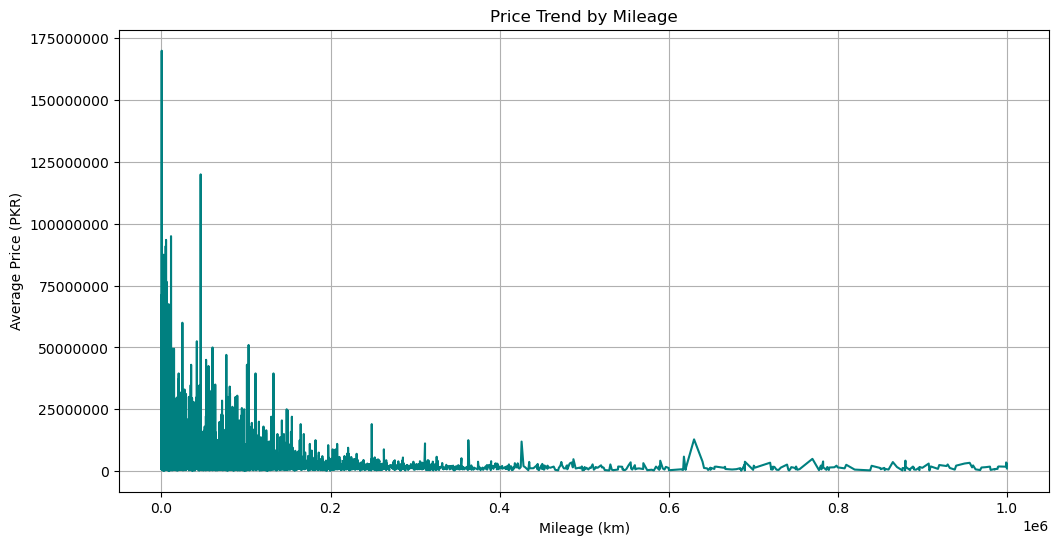

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='mileage', y='price', errorbar=None, color='teal')
plt.title('Price Trend by Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Average Price (PKR)')

# Fixing scientific notation on X-axis
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True)

plt.show()

**Observation:**
The line plot reveals the depreciation behavior associated with vehicle usage. There is a negative correlation. Prices are highest for cars with low mileage (0–50,000 km) and gradually decline as mileage increases.
<br><br>
**Conclusion:** Mileage is a useful predictor for price.

### 3.7 Depreciation Trend Analysis
We plot the median price over model years, separated by transmission type, to visualize the depreciation curve and the impact of recent market inflation.

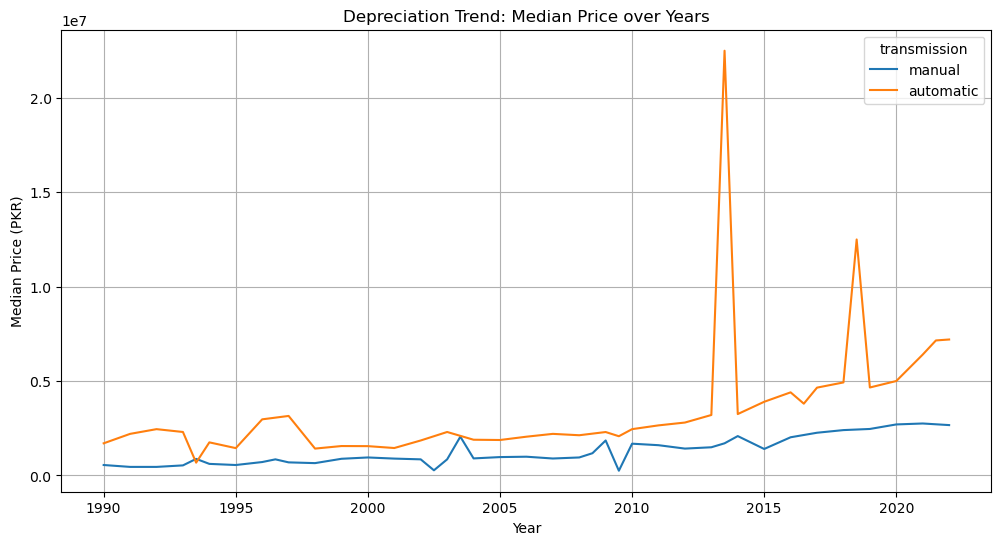

In [34]:
plt.figure(figsize=(12, 6))

# Scatter plot: Year on X, Price on Y, Color by Transmission
sns.lineplot(data=df, x='year', y='price', hue='transmission', estimator='median', errorbar=None)

plt.title('Depreciation Trend: Median Price over Years')
plt.ylabel('Median Price (PKR)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

**Observation:**
The trend line reveals three critical market insights:
1.  **Exponential Depreciation:** Price decreases significantly as the vehicle age increases.
2.  **The Transmission Gap:** The gap between **Automatic** (higher line) and **Manual** (lower line) widens drastically for newer models. This confirms that while manual transmission was standard in the past, the modern market places a massive price on automatic cars.
3.  **The Inflation Spike (2018-2022):** The curve shoots up almost vertically for the most recent years. This is not just standard "new car value" but reflects the **hyper-inflation** and currency devaluation in Pakistan, causing used car prices to skyrocket recently.

**Conclusion:** `Year` is the most powerful predictor in the dataset, capturing both age-related depreciation and macroeconomic inflation trends.

### 3.8 Impact of Registration City
Does the city on the license plate affect the car's value? In Pakistan, it is widely believed that Islamabad and Punjab numbers command a premium over Sindh numbers due to resale value.

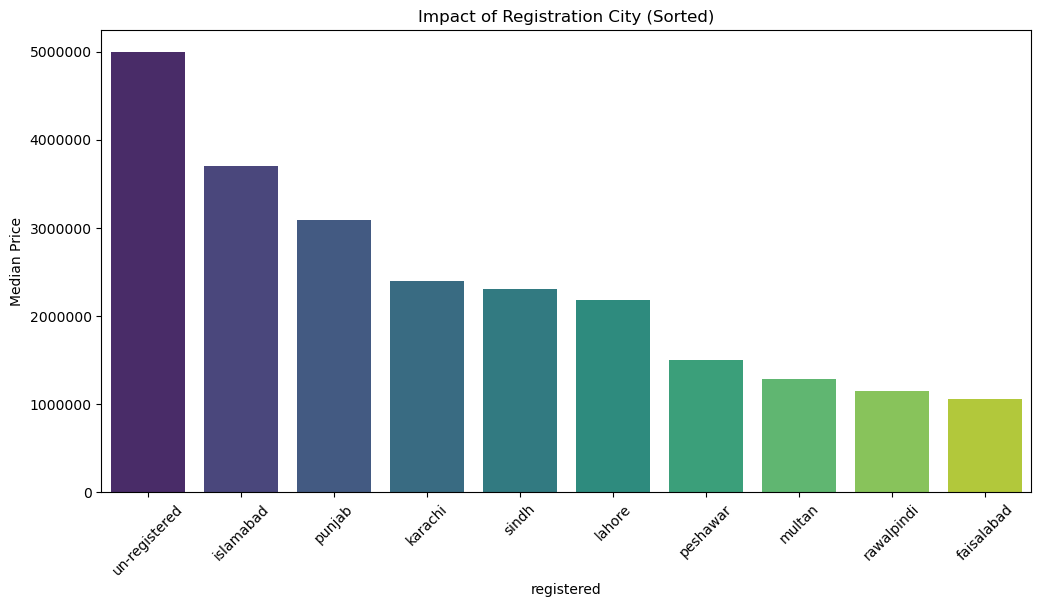

In [35]:
plt.figure(figsize=(12, 6))

# Filtering Top 10 Cities
top_cities = df['registered'].value_counts().head(10).index
df_city = df[df['registered'].isin(top_cities)]

# Creating a Sorted List 
sorted_data = df_city.groupby('registered')['price'].median().sort_values(ascending=False)

# Plotting
sns.barplot(x=sorted_data.index, y=sorted_data.values, palette='viridis', hue=sorted_data.index)

plt.title('Impact of Registration City (Sorted)')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Observation:**
The data validates the "Registration Premium":
1.  **Unregistered Premium:** **Unregistered** cars have the highest median price. As "Applied For" or fresh imports are effectively brand new.
2.  **Islamabad & Punjab:** Among registered vehicles, **Islamabad** and **Punjab** command the highest prices.
3.  **Karachi & Rural Areas:** **Karachi**, **Hyderabad**, and **Multan** show lower median prices.

**Conclusion:** Registration City has a good impact on the price of the car.

### 3.9 Market Segmentation: Brand vs. Body Type
We use a heatmap to visualize the median price for different Brand-Body combinations.

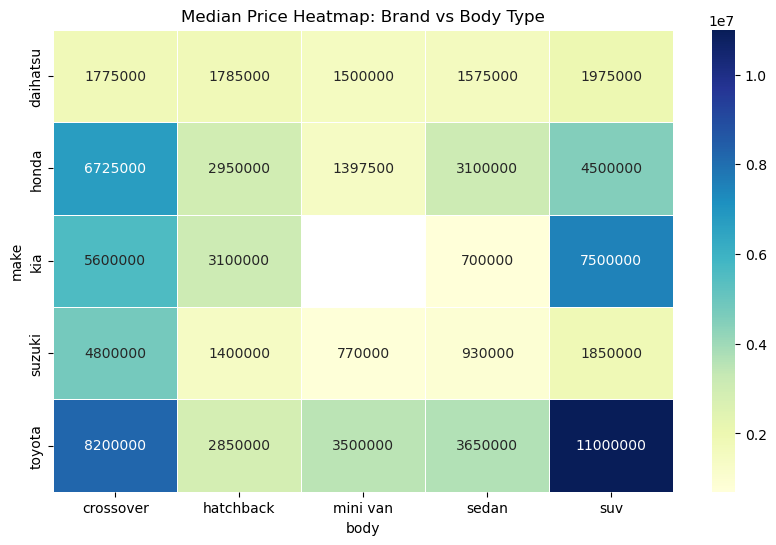

In [36]:
# 1. Select top 5 brands and top 5 body types to keep it readable
top_makes = df['make'].value_counts().head(5).index
top_bodies = df['body'].value_counts().head(5).index

# 2. Filter data
df_heatmap = df[(df['make'].isin(top_makes)) & (df['body'].isin(top_bodies))]

# 3. Create Pivot Table (The matrix of Price)
# We calculate the MEDIAN price for every combination (e.g., Toyota + SUV)
pivot = df_heatmap.pivot_table(values='price', index='make', columns='body', aggfunc='median')

# 4. Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)

plt.title('Median Price Heatmap: Brand vs Body Type')
plt.show()

**Observation:**
The heatmap provides a clear segmentation of the market:
1.  **The Luxury Cluster (Dark Blue):** The right corner shows a high-value cluster for **Toyota** and **Kia** in the **SUV/Crossover** categories. This represents the premium segment (e.g., Fortuner, Prado, Sportage) where median prices exceed 5-6 Million PKR.
2.  **The Budget Cluster (Light Yellow):** This area is dominated by **Suzuki** and **Daihatsu** in almost all categories. The light colors indicate much lower median prices, confirming their stronghold on the economy sector.
3.  **Sedan Stability:** The **Sedan** column shows consistent mid-range pricing across all brands, acting as the "standard" for the market.

**Conclusion:** The interaction between `make` and `body` is significant. A "Toyota SUV" is a completely different price class than a "Toyota Hatchback," justifying the use of complex models that can learn these combinations.

### 3.10 Price Distribution by Body Type
We analyze the median prices across all body types to understand how the market values different vehicle classes, from compact hatchbacks to luxury SUVs.

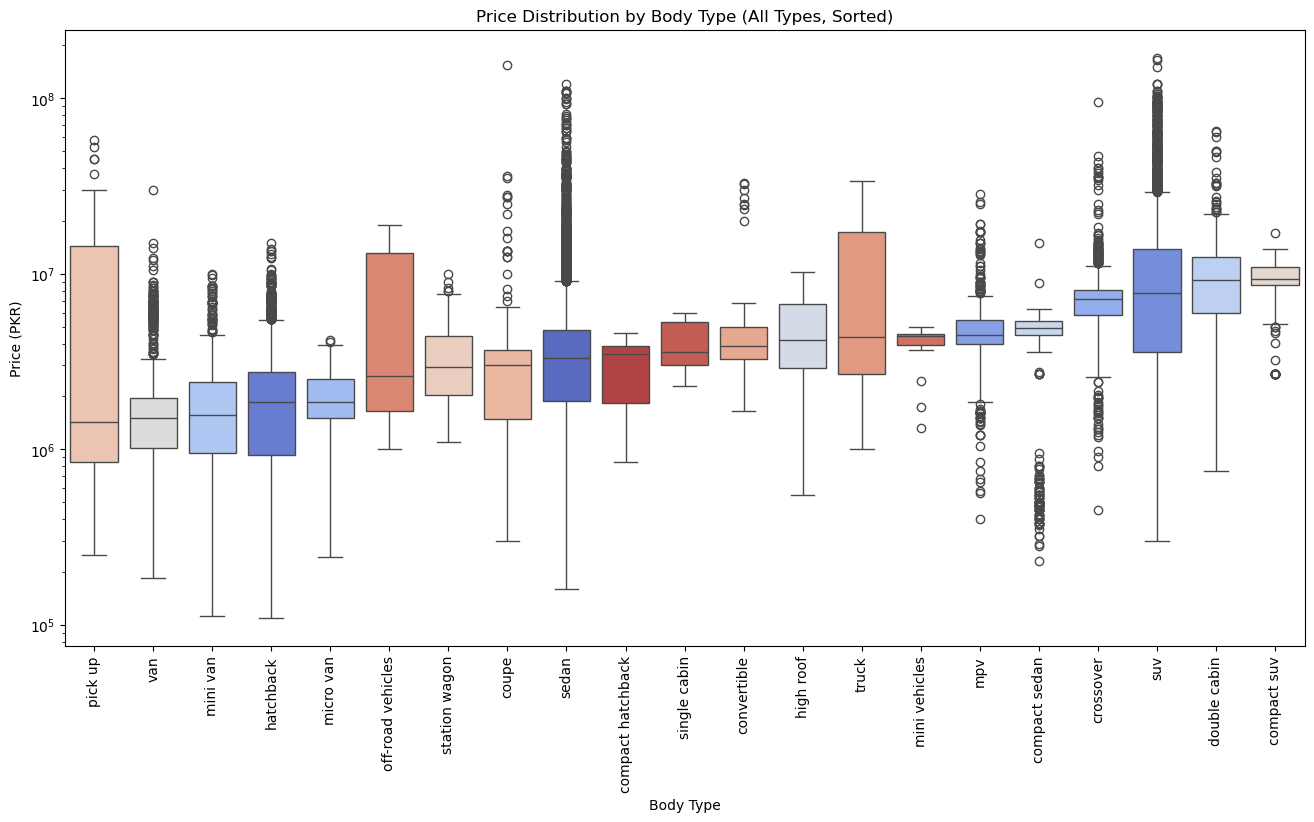

In [37]:

plt.figure(figsize=(16, 8)) # Increased size to fit all labels

# 1. Sort ALL body types by Median Price (Cheapest -> Expensive)
sorted_order = df.groupby('body')['price'].median().sort_values(ascending=True).index

# 2. Create Box Plot with ALL data
sns.boxplot(
    data=df, 
    x='body', 
    y='price', 
    order=sorted_order, 
    palette='coolwarm',
    hue='body'
)

plt.title('Price Distribution by Body Type (All Types, Sorted)')
plt.ylabel('Price (PKR)')
plt.xlabel('Body Type')
plt.yscale('log') # Essential for seeing both cheap and expensive cars clearly
plt.xticks(rotation=90) # Rotate 90 degrees so labels don't overlap
plt.show()

**Observation:**
1.  **Entry-Level (Left):** The chart starts with **Vans**, **Minivans**, and **Hatchbacks**. These have the lowest median prices.
2.  **Mid-Range (Center):** **Sedans** sit comfortably in the middle.
3.  **Premium Segment (Right):** Moving to the right, we see **SUVs** and **Crossovers**. These categories command the highest median prices.
4.  **Specialty Vehicles:** Categories like "Double Cabin" (Revo/Hilux) also appear on the higher end, holding strong resale value due to their commercial and off-road demand.

**Conclusion:** Body type is a definitive indicator of price segment and is essential for the model to differentiate between a 10-Lakh Hatchback and a 1-Crore SUV.

### 3.10 Price Distribution by Fuel Type
We compare the median prices of different fuel types (Petrol, Diesel, Hybrid, Electric).

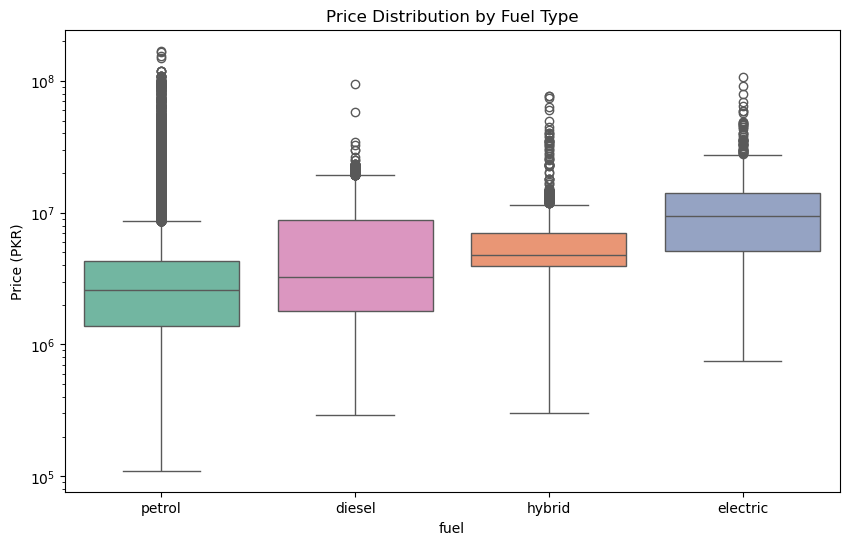

In [38]:
plt.figure(figsize=(10, 6))

# Sort by Median Price
fuel_order = df.groupby('fuel')['price'].median().sort_values(ascending=True).index

sns.boxplot(data=df, x='fuel', y='price', order=fuel_order, palette='Set2', hue='fuel')

plt.title('Price Distribution by Fuel Type')
plt.yscale('log')
plt.ylabel('Price (PKR)')
plt.show()

**Observation:**
The plot reveals a stark contrast in pricing based on powertrain technology:
1.  **Petrol & Diesel:** **Petrol** and **Diesel** vehicles form the core of the market. While they have similar medians, the Diesel category shows a wider range, likely due to expensive SUVs (Prado/Fortuner) utilizing diesel engines.
3.  **Hybrid & Electric:** **Hybrid** and **Electric** vehicles have the highest median prices. This reflects the premium attached to modern technology (e.g., Prius, Vezel, Tesla) and also these cars are generally newer imports.

**Conclusion:** Fuel type is a strong for predicitng price of the car.

### 3.11 Price Distribution by Color
We analyze the price distribution across the colors.

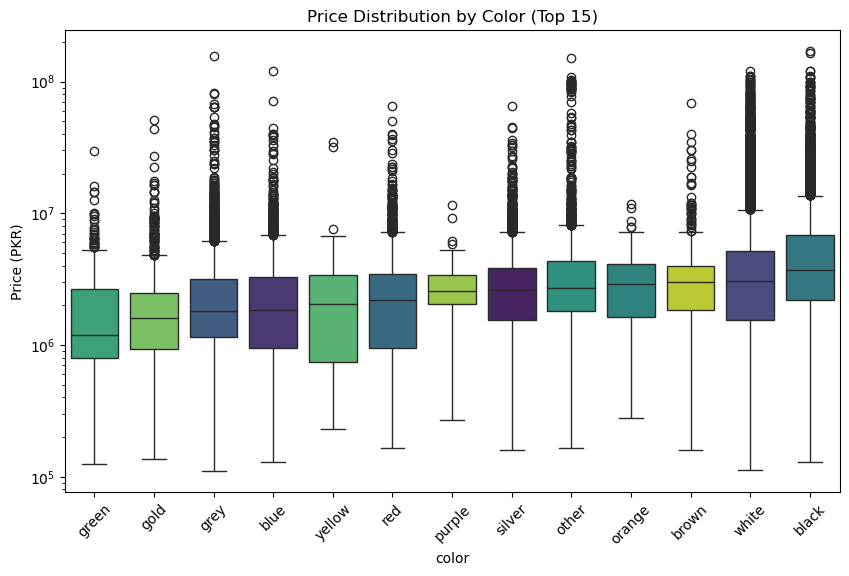

In [39]:
plt.figure(figsize=(10, 6))

# Sort by Median Price
color_order = df.groupby('color')['price'].median().sort_values(ascending=True).index

sns.boxplot(data=df, x='color', y='price', order=color_order, palette='viridis', hue='color')

plt.title('Price Distribution by Color (Top 15)')
plt.yscale('log')
plt.ylabel('Price (PKR)')
plt.xticks(rotation=45)
plt.show()

**Observation:**
The plot confirms that while most colors fall into a similar price range, subtle market preferences exist:
1.  **High Resale Colors:** **White** and **Black**  show the highest median prices. 
2.  **Budget Colors:** Colors like **Gold**, **Green**, and **Grey** appear on the lower end of the median price spectrum.
3.  **Outliers:** The log scale reveals that every color has high-priced outliers, confirming that color is not the primary factor.

**Conclusion:** Color is not a strong primary predictor but provides a **small signal**.

### 3.12 Current City Location
Although we decided to keep the `registered` city (license plate location) due to its high importance, we will evaluate the predictive strength of the car's **current city location** (`city`).

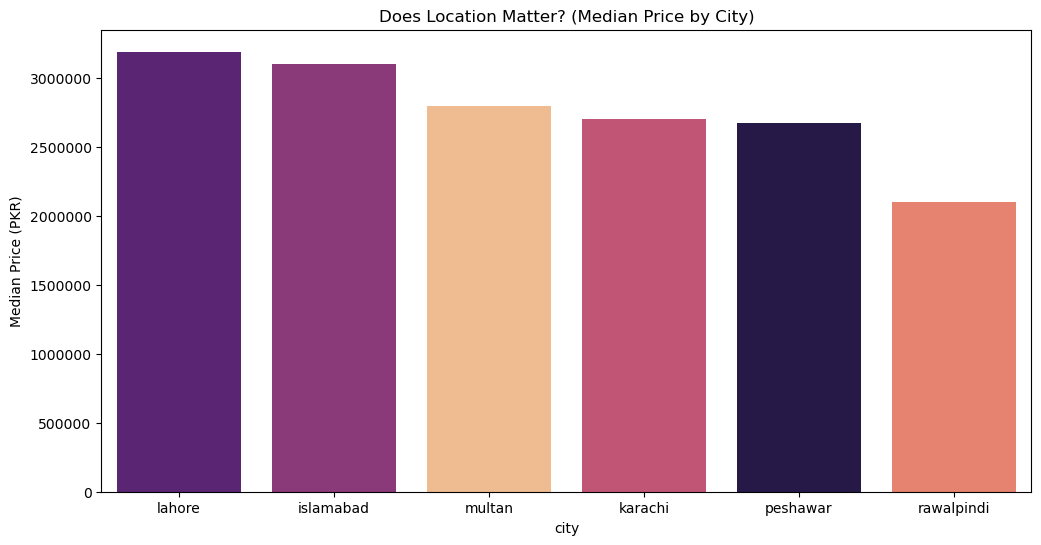

In [40]:
plt.figure(figsize=(12, 6))

# Filter big cities
major_cities = ['lahore', 'karachi', 'islamabad', 'rawalpindi', 'peshawar', 'multan']
df_city_check = df[df['city'].isin(major_cities)]

# Sort by Price
sorted_order = df_city_check.groupby('city')['price'].median().sort_values(ascending=False).index

# Plot
sns.barplot(
    data=df_city_check, 
    x='city', 
    y='price', 
    estimator='median', 
    errorbar=None, 
    order=sorted_order,
    palette='magma',
    hue='city'
)

plt.title('Does Location Matter? (Median Price by City)')
plt.ylabel('Median Price (PKR)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Observation (Current City Location):**
The bar chart shows a slight price gradient based on the car's current city location:
1.  **High Range:** **Lahore** and **Islamabad** show the highest median prices, suggesting a market preference for cars located in major cities.
2.  **Low Range:** **Rawalpindi** and **Peshawar** show the lowest median prices among the major cities.
3.  **Weak Signal:** The difference between the highest (Lahore) and lowest (Rawalpindi) is visually small relative to the overall price scale.

**Conclusion:** The signal provided by the car's current `city` is **too weak** and redundant with the stronger `registered` city signal. Given its high unique values (~300 unique values), we proceed with **dropping** the `city` column to simplify the final machine learning model, thereby reducing training time and complexity.

In [41]:
df = df.drop('city',axis=1) 

## Phase 4: Feature Engineering & ML Setup
The clean data must now be converted into a purely numeric for the machine learning algorithms. 

### 4.1 Implementing Frequency Encoding
To manage the high dimensionality of features like make, model, and registered (each having over 70 unique values), we employ Frequency Encoding. This technique replaces the original text label (e.g., 'Toyota') with its popularity score (the percentage of times it appears in the dataset).

In [42]:
# Dictionary to save the conversion logic
freq_maps = {}
complex_cols = ['make', 'model', 'registered']

for col in complex_cols:

    # Calculating the popularity score (frequency as a percentage)
    freq_map = df[col].value_counts(normalize=True)

    # Saving the map for use in prediction functions 
    freq_maps[col] = freq_map

    # Replacing the text name with its score 
    df[col] = df[col].map(freq_map)

### 4.2 Implementing One-Hot Encoding 
We apply One-Hot Encoding to all nominal features with a small number of unique categories. This transforms text labels into binary (0 or 1) columns, which is the mathematically correct way to represent nominal data for regression models.

`pd.get_dummies()` creates a simple matrix of 0s and 1s, making the data readable for the model. The use of `drop_first=True` removes one redundant column for each feature.

In [43]:
simple_cols = ['fuel', 'transmission', 'assembly', 'body', 'color']
df = pd.get_dummies(df, columns=simple_cols, drop_first=True)

In [44]:
# Dataset after Encoding
df.head(10)

,make,model,year,engine,registered,mileage,price,fuel_electric,fuel_hybrid,fuel_petrol,...,color_gold,color_green,color_grey,color_orange,color_other,color_purple,color_red,color_silver,color_white,color_yellow
0,0.319859,0.165271,2013.0,1300.0,0.240594,145000.0,2870000.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0.210945,0.067760,2000.0,1300.0,0.240594,230000.0,995000.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.319859,0.016577,2021.0,1300.0,0.120869,60500.0,3585000.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,0.286962,0.019697,2017.0,1300.0,0.243291,87000.0,2250000.0,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,0.210945,0.106282,2017.0,1800.0,0.240594,86000.0,4850000.0,False,False,True,...,False,False,True,False,False,False,False,False,False,False
5,0.210945,0.106282,2010.0,1300.0,0.120869,157000.0,2850000.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,0.286962,0.019697,2019.0,1300.0,0.243291,45000.0,2675000.0,False,False,True,...,False,False,True,False,False,False,False,False,False,False
7,0.210945,0.067760,2016.0,1300.0,0.240594,187000.0,3450000.0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
8,0.040833,0.004867,2019.0,660.0,0.064961,22517.0,3850000.0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
9,0.210945,0.067760,2014.0,1300.0,0.240594,110000.0,2585000.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# Converting Bool Coulms to Int

bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 77878 entries, 0 to 77880
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   make                    77878 non-null  float64
 1   model                   77878 non-null  float64
 2   year                    77878 non-null  float64
 3   engine                  77878 non-null  float64
 4   registered              77878 non-null  float64
 5   mileage                 77878 non-null  float64
 6   price                   77878 non-null  float64
 7   fuel_electric           77878 non-null  int64  
 8   fuel_hybrid             77878 non-null  int64  
 9   fuel_petrol             77878 non-null  int64  
 10  transmission_manual     77878 non-null  int64  
 11  assembly_local          77878 non-null  int64  
 12  body_compact sedan      77878 non-null  int64  
 13  body_compact suv        77878 non-null  int64  
 14  body_convertible        77878 non-null  int

In [46]:
# Storing predictor colunms for predictor function after model making
model_columns = df.drop('price', axis=1).columns

### 4.3 Scaling and Final Data Split
We perform two crucial tasks: data splittin, and standardization to ensure all features contribute fairly to the model's learning process.

In [47]:
X = df.drop('price', axis=1) 
y = df['price']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on TRAIN, but transform both. 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Split and Scaled!")
print(f"Training Data: {X_train_scaled.shape}")
print(f"Testing Data: {X_test_scaled.shape}")

Data Split and Scaled!
Training Data: (62302, 43)
Testing Data: (15576, 43)


### Phase 5: Model Training & Evaluation
This phase executes the machine learning strategy by comparing models of increasing complexity to identify the most robust and accurate predictor of car price.

### 5.1 Model Evaluation and Visualization
This block is a  function to evaluate the model's performance on the unseen test set. We calculate key error metrics (R2, RMSE, MAE) and generate an Actual vs. Predicted Plot to visually assess the model's fit.

In [48]:
def print_scores(model_name, y_test, y_pred):
    # Calculate Metrics 
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print Report 
    print(f"--- {model_name} Performance Report ---")
    print(f"R2 Score (Accuracy): {r2:.4f} (Closer to 1.0 is better)")
    print(f"RMSE (Avg Error):    {rmse:,.0f} PKR")
    print(f"MAE (Abs Error):     {mae:,.0f} PKR")

def make_plot(model_name, y_test, y_pred):
    
    # Actual vs Predicted
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of Truth vs Guess
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
    
    # The "Perfect Prediction" Red Diagonal Line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, linestyle='--')
    
    plt.title(f'{model_name}: Actual Prices vs. Predicted Prices')
    plt.xlabel('Actual Price (Truth)')
    plt.ylabel('Predicted Price (Model Guess)')
    plt.ticklabel_format(style='plain', axis='both') # Remove scientific notation
    plt.grid(True)
    plt.show()



### 5.2 Model Training: Linear Regression
This is our initial baseline model. Linear Regression assumes a straightforward, straight-line relationship between the features (Year, Engine, Mileage, etc.) and the target price.

--- Linear Regression Performance Report ---
R2 Score (Accuracy): 0.4432 (Closer to 1.0 is better)
RMSE (Avg Error):    4,443,603 PKR
MAE (Abs Error):     1,622,464 PKR


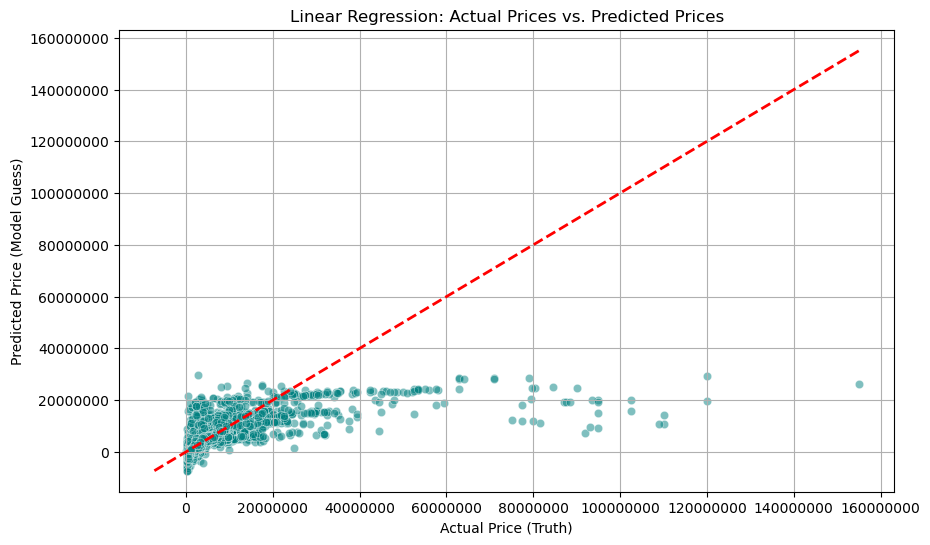

In [49]:
# Initialize
lr_model = LinearRegression()

# Train
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print_scores("Linear Regression", y_test, y_pred_lr)
make_plot("Linear Regression", y_test, y_pred_lr)

### 5.3 Model Training: Polynomial Regression
This is our "Medium Complexity" model. Polynomial Regression introduces curved lines into the analysis by creating interaction and squared features (e.g., Year^2 and Year*Mileage). This approach is used to capture non-linear relationships in the data, which is essential for accurately modeling the non-straight-line behavior of car depreciation. The model is built as a Scikit-learn pipeline to ensure that the process of feature transformation (creating the curves) is applied before the Linear Regression algorithm is fit.

--- Polynomial Regression (Deg 2) Performance Report ---
R2 Score (Accuracy): 0.6678 (Closer to 1.0 is better)
RMSE (Avg Error):    3,432,103 PKR
MAE (Abs Error):     1,107,006 PKR


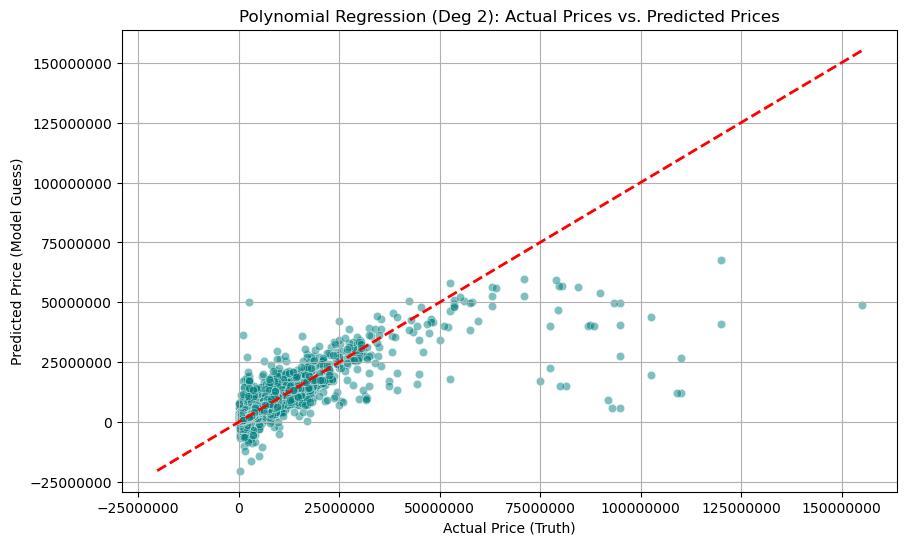

In [50]:
# Pipeline: Create Interactions -> Apply Linear Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# Train
poly_model.fit(X_train_scaled, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test_scaled)

# Evaluate
print_scores("Polynomial Regression (Deg 2)", y_test, y_pred_poly)
make_plot("Polynomial Regression (Deg 2)", y_test, y_pred_poly)

### 5.4 Model Training: Random Forest Hyperparameter Tuning
The Random Forest Regressor is our most complex model and offers the highest predictive power. We now perform a manual Grid Search (by iterating through max_depth from 8 to 20) to find the optimal tree depth.

In [51]:
# Data Collection for Plot 
depths = []
r2_scores = []
rmse_scores = []
mae_scores = []

print("Starting Hyperparameter Tuning Visualization")
for n in range(8, 21):
    # Initialize & Train Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=n)
    rf_model.fit(X_train_scaled, y_train)
    
    # Predict & Evaluate
    y_pred_rf = rf_model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred_rf)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    mae = mean_absolute_error(y_test, y_pred_rf)
    
    # Store Results
    depths.append(n)
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    
    print(f"Depth {n}: R2={r2:.4f}, MAE={mae:.0f}")

Starting Hyperparameter Tuning Visualization
Depth 8: R2=0.8581, MAE=701814
Depth 9: R2=0.8712, MAE=624851
Depth 10: R2=0.8805, MAE=563239
Depth 11: R2=0.8860, MAE=517281
Depth 12: R2=0.8888, MAE=481446
Depth 13: R2=0.8901, MAE=457360
Depth 14: R2=0.8900, MAE=441840
Depth 15: R2=0.8886, MAE=433883
Depth 16: R2=0.8904, MAE=429142
Depth 17: R2=0.8934, MAE=425517
Depth 18: R2=0.8931, MAE=425608
Depth 19: R2=0.8912, MAE=426665
Depth 20: R2=0.8921, MAE=426434


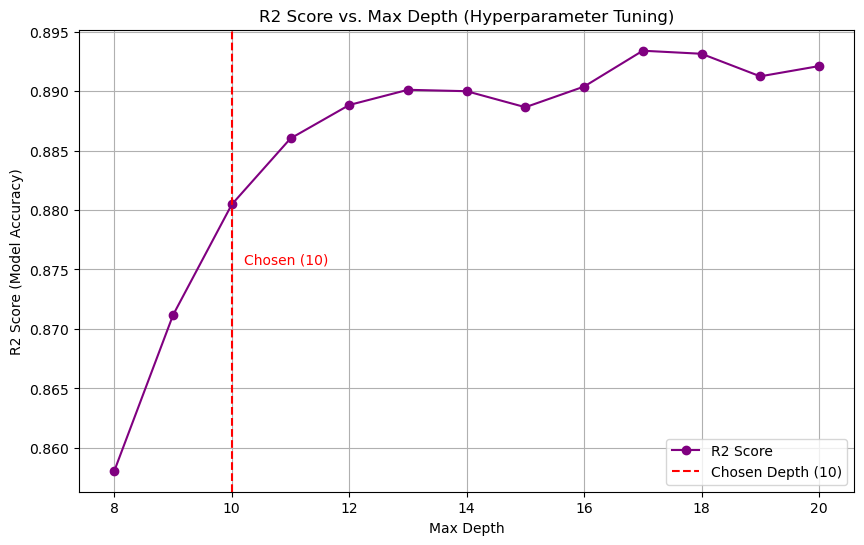

In [52]:
# Plotting the Results 

tuning_results = pd.DataFrame({
    'Max_Depth': depths,
    'R2_Score': r2_scores,
    'MAE': mae_scores
})

plt.figure(figsize=(10, 6))

# Plot R2 Score vs. Max Depth
plt.plot(tuning_results['Max_Depth'], tuning_results['R2_Score'], marker='o', color='purple', label='R2 Score')
plt.title('R2 Score vs. Max Depth (Hyperparameter Tuning)')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score (Model Accuracy)')

# Highlighting the chosen depth 
chosen_depth = 10 
chosen_r2 = tuning_results[tuning_results['Max_Depth'] == chosen_depth]['R2_Score'].iloc[0]

# Adding a vertical line to mark the chosen Max Depth 
plt.axvline(x=chosen_depth, color='red', linestyle='--', label=f'Chosen Depth ({chosen_depth})')
plt.annotate(f'Chosen ({chosen_depth})', xy=(chosen_depth + 0.2, chosen_r2 - 0.005), color='red', fontsize=10)

plt.grid(True)
plt.legend()
plt.show()

### 5.5 Final Selection and Conclusion
The **Random Forest Regressor** consistently outperformed the simpler models, achieving a peak R^2 of 0.8934. However, for deployment: Final Model Chosen: Random Forest with Max Depth 10 (R^2 = 0.8805).<br>
The **final decision** prioritized generalization over the small raw accuracy gain of the Depth 17 model. By selecting a shallower depth, the model is less likely to memorize noisy outliers in the training set, ensuring it is more stable and reliable when predicting the price of truly unseen vehicles. <br>
**Result:** The final model predicts prices with a highly accurate 88.05% score and an average error (MAE) of approximately 563,000 PKR.

Training Random Forest... (This will take a minute)
--- Random Forest Performance Report ---
R2 Score (Accuracy): 0.8805 (Closer to 1.0 is better)
RMSE (Avg Error):    2,058,817 PKR
MAE (Abs Error):     563,239 PKR


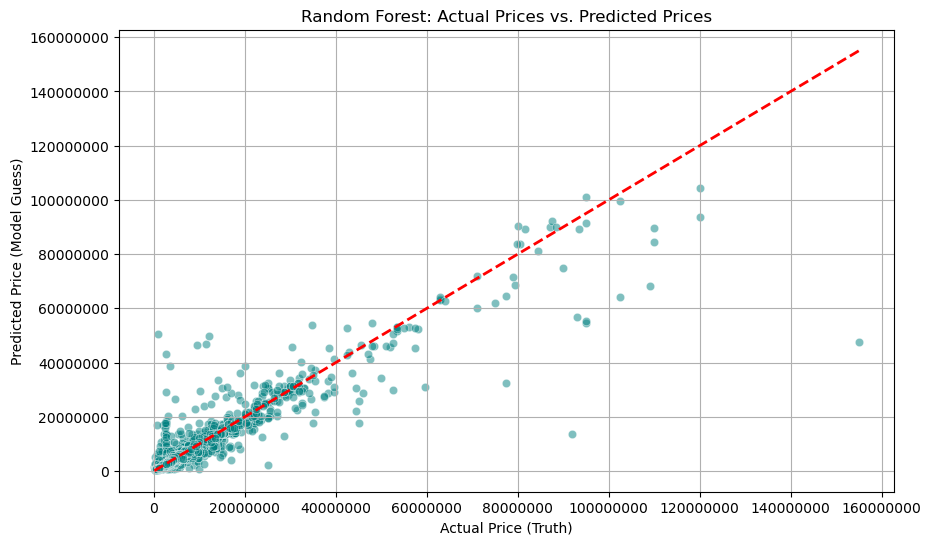

In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)

# Train
print("Training Random Forest... (This will take a minute)")
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate
print_scores("Random Forest", y_test, y_pred_rf)
make_plot("Random Forest", y_test, y_pred_rf)

### 5.6 Prediction on New Sample

#### 5.6.7 Predictor Function

In [54]:
def predict_car_price(year, mileage, engine, make, model, registered, 
                         fuel, transmission, assembly, body, color):
    
    # Create a DataFrame for the single new car
    new_data = pd.DataFrame({
        'year': [year],
        'mileage': [mileage],
        'engine': [engine],
        'make': [make.lower()],
        'model': [model.lower()],
        'registered': [registered.lower()],
        'fuel': [fuel.lower()],
        'transmission': [transmission.lower()],
        'assembly': [assembly.lower()],
        'body': [body.lower()],
        'color': [color.lower()]
    })

    # Applying Frequency Encoding 
    for col in ['make', 'model', 'registered']:
        val = new_data[col].iloc[0]
        if val in freq_maps[col]:
            new_data[col] = freq_maps[col][val]
        else:
            new_data[col] = 0.001 # Default for unknown items

    # Applingy One-Hot Encoding
    new_data = pd.get_dummies(new_data, columns=['fuel', 'transmission', 'assembly', 'body', 'color'], drop_first=True)

    # Force the new data to have the EXACT same columns as X_train.
    new_data = new_data.reindex(columns=model_columns, fill_value=0)

    # Scale
    new_data_scaled = scaler.transform(new_data)

    # Predict
    predicted_price = rf_model.predict(new_data_scaled)[0]
    
    return predicted_price


#### 5.6.8 Predicting Price

In [55]:
price = predict_car_price(
    2005,
    200000,
    1500,
    'Honda',
    'civic',
    'lahore',
    'petrol',
    'automatic',
    'local',
    'sedan',
    'white'
)

print("\n=======================================================")
print(" Your Predicted Car Price:")
print(f"   {price:,.0f} PKR")
print("=======================================================")



 Your Predicted Car Price:
   1,616,970 PKR


### 5.7 Importing Model

In [56]:
import joblib

# Bundle everything together (Model, Scaler, Freq Maps, Columns)
final_package = {
    'model': rf_model,       # Your trained 88.05% accuracy model
    'scaler': scaler,           # The standardization tool
    'freq_maps': freq_maps,     # The frequency encoding scores
    'model_columns': model_columns # The exact column order
}

# Save to a file
joblib.dump(final_package, 'final_car_price_model.pkl')

['final_car_price_model.pkl']

### 🏁 Phase 6: Conclusion & Project Summary
This project successfully implemented a complete machine learning pipeline to predict used car prices in the Pakistani market, moving from raw data inspection to a highly robust prediction model.
### 6.1 Summary of Data Preprocessing
The high accuracy achieved is a direct result of specialized data cleaning:
- **Missing Values:** Null entires were handled with proper techniques to ensure proper meaningful data.
- **Outlier Management:** Data entry errors in Engine Capacity (e.g., 15,000cc) were fixed using median imputation.
- **Feature Engineering:** Electric Vehicles (EVs) were normalized to their performance-equivalent engine sizes and their fuel type was accurately corrected to 'Electric'.
- **Encoding Strategy:** A hybrid encoding approach was used, combining Frequency Encoding (for Make/Model) to manage high cardinality and One-Hot Encoding (for Fuel/Transmission). The weak and noisy city feature was successfully dropped.

### 6.2 Model Performance and Final Selection
The model comparison validated the necessity of using non-linear ensemble methods for this task:
- **Linear Regression model** with R2 score of 0.4432 failed to capture the non-linear curve.
- **Random Forest (Final)** with R2 score of 0.8805 exceled at handling complex feature interactions.
The **Random Forest Regressor** achieved an overall accuracy of 88.05% on unseen test data. The Mean Absolute Error (MAE) of 563,239 PKR is highly acceptable, given the significant price variance (PKR 500,000 to PKR 50,000,000) within the dataset.

### 6.3 Key Market Insights
The Exploratory Data Analysis and the model's structure confirmed several key market drivers:
- **Year and Engine are Dominant:** These features proved to be the strongest predictors, with the model accurately capturing both standard depreciation and the sharp spike in prices due to recent economic inflation.
- **Market Premiums:** The model strongly validates the premium attached to Automatic transmission vehicles and cars registered in major, dry-climate cities (e.g., Islamabad) over Karachi-registered units.
- **Model Robustness:** The final model was deliberately constrained to a Max Depth of 10 to prevent overfitting, ensuring the solution is stable and reliable for real-world price prediction queries.

The trained model, scaler, and encoding maps have been saved (final_car_price_model.pkl) and are ready for deployment into a prediction interface.